### Exploring the data

In [1]:
# Reading the loan Data
# Reading the dataset
import pandas as pd
import numpy as np
LoanData=pd.read_csv('C:/Users/HP/Downloads/train.csv', encoding='latin')
print('Shape before deleting duplicate values:', LoanData.shape)

# Removing duplicate rows if any
LoanData=LoanData.drop_duplicates()
print('Shape After deleting duplicate values:', LoanData.shape)

LoanData.head(10)
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (614, 13)
Shape After deleting duplicate values: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
# Looking at the number of rows and columns
LoanData.shape

(614, 13)

In [3]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


### Removing useless variables from data

In [4]:
# Data Pre Processing
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumn = ['Loan_ID']
LoanData = LoanData.drop(UselessColumn,axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Looking at the statistial distribution of the data
LoanData.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


### Observe the distribution of target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

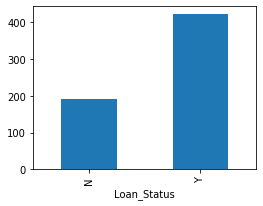

In [6]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
LoanData.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

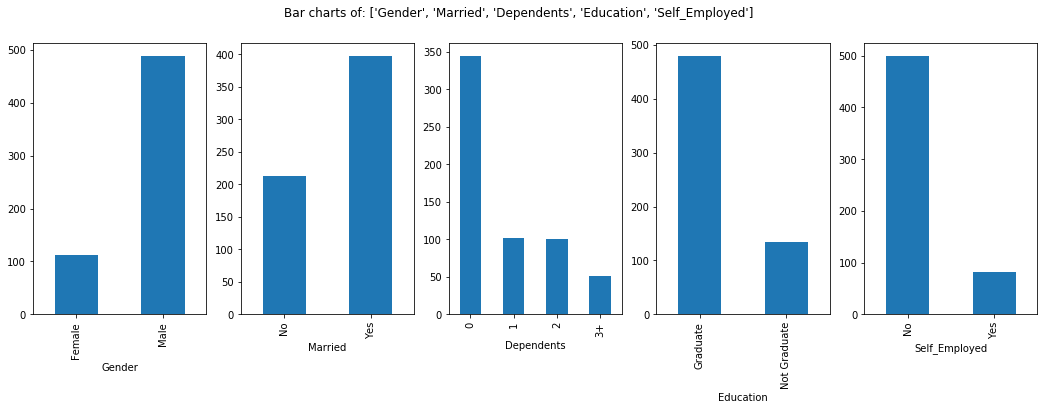

In [8]:
# Plotting multiple bar charts for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender','Married','Dependents','Education','Self_Employed'])

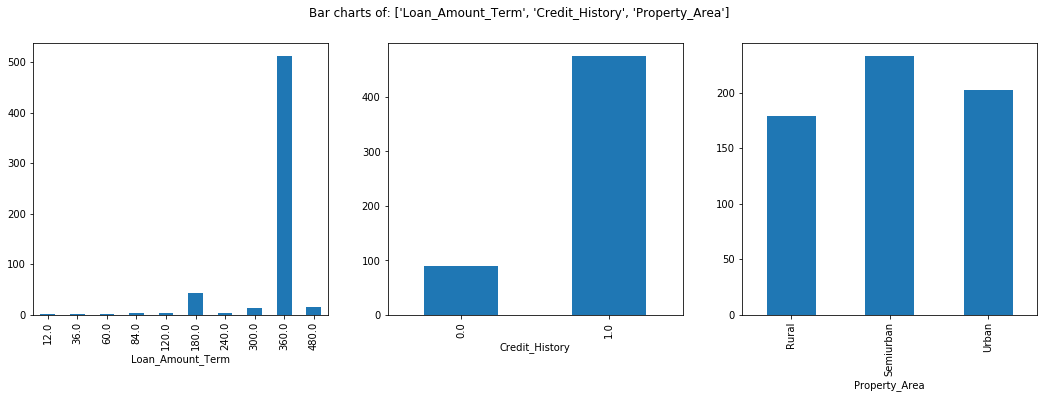

In [9]:
PlotBarCharts(inpData=LoanData, colsToPlot=['Loan_Amount_Term','Credit_History','Property_Area'])

### Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D752B1FC8>,
      dtype=object)

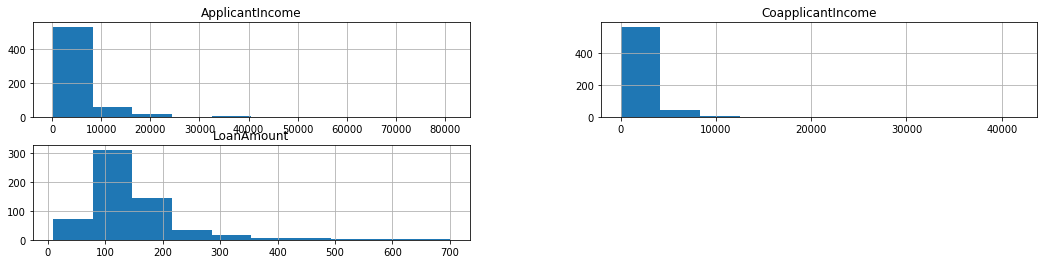

In [10]:
# Plotting histograms of multiple columns together
# Observe that Fare column has outliers
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,4))

### Relationship exploration: Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

In [11]:
# Grouping by Categorical variable Survived to find the aggregated values
GroupedData=LoanData.groupby(['Loan_Status'])

GroupedData.mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


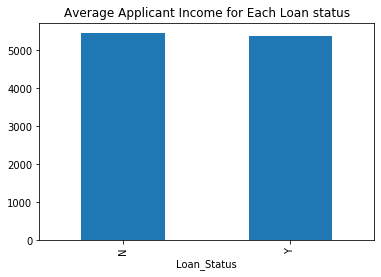

In [12]:
# Creating the graph with Price
# You can observice that many people who survived has paid higher fares!
GroupedData.mean()['ApplicantIncome'].plot(kind='bar', title='Average Applicant Income for Each Loan status')

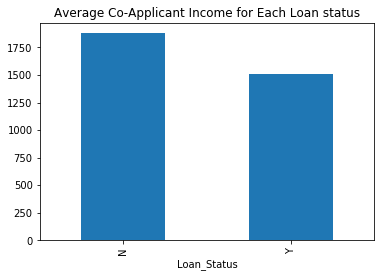

In [13]:
GroupedData.mean()['CoapplicantIncome'].plot(kind='bar', title='Average Co-Applicant Income for Each Loan status')

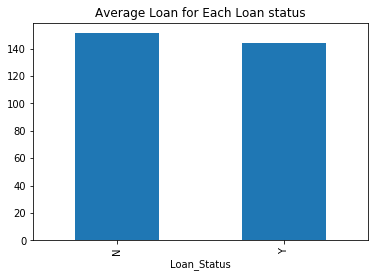

In [14]:
GroupedData.mean()['LoanAmount'].plot(kind='bar', title='Average Loan for Each Loan status')

In [15]:
# Finding those rows where Fare column has outliers
LoanData[LoanData['ApplicantIncome']>35000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [16]:
# Finding those rows where Fare column has outliers
LoanData[LoanData['LoanAmount']>500]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
369,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y


#### Outlier Treatment

In [17]:

LoanData['ApplicantIncome'][LoanData['ApplicantIncome']>30000] = 25000
LoanData[LoanData['ApplicantIncome']>35000]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [18]:
LoanData['LoanAmount'][LoanData['LoanAmount']>500] = 400

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### BoxPlot after Outlier Treatment

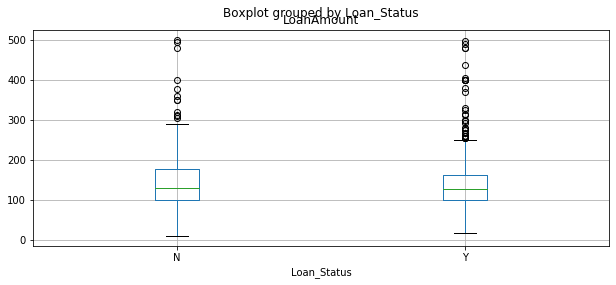

In [19]:
LoanData.boxplot(column='LoanAmount', by='Loan_Status', figsize=(10,4), vert=True)

#### Histogram after Outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D7544A608>,
      dtype=object)

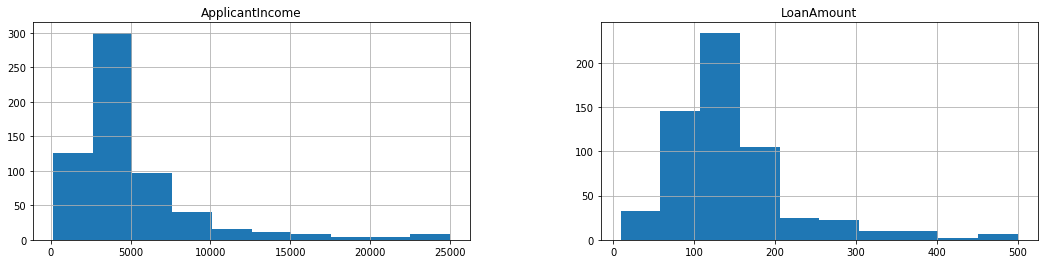

In [20]:
LoanData.hist(['ApplicantIncome','LoanAmount'], figsize=(18,4))

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [21]:
LoanData['Loan_Status'].replace({"Y":1,"N":0},inplace = True)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [22]:
LoanData['LoanAmount'] = LoanData['LoanAmount'].fillna(0)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [23]:
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that variable are NOT correlated with each other


Loan_Status_0=LoanData['CoapplicantIncome'][LoanData['Loan_Status']==0]
Loan_Status_1=LoanData['CoapplicantIncome'][LoanData['Loan_Status']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Loan_Status_0,Loan_Status_1)

print('P-Value for Anova is:',AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05

P-Value for Anova is: 0.1429482868428829


In [24]:
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that variable are NOT correlated with each other


Loan_Status_0=LoanData['ApplicantIncome'][LoanData['Loan_Status']==0]
Loan_Status_1=LoanData['ApplicantIncome'][LoanData['Loan_Status']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Loan_Status_0,Loan_Status_1)

print('P-Value for Anova is:',AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05

P-Value for Anova is: 0.949854455283613


### Relationship exploration: Categorical Vs Categorical
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

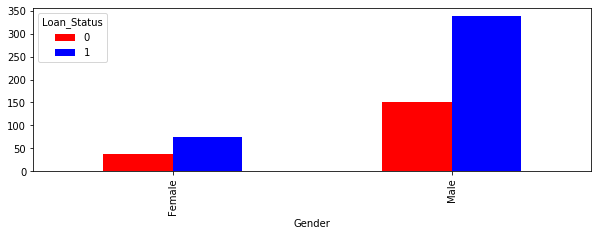

In [25]:
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

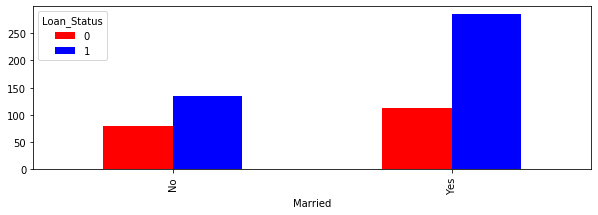

In [26]:
CrossTabResult=pd.crosstab(index=LoanData['Married'], columns=LoanData['Loan_Status'])
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

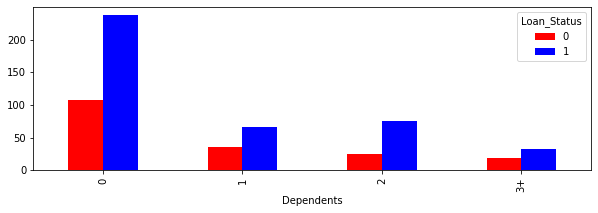

In [27]:
CrossTabResult=pd.crosstab(index=LoanData['Dependents'], columns=LoanData['Loan_Status'])
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

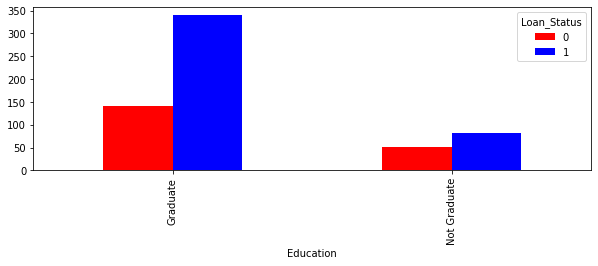

In [28]:
CrossTabResult=pd.crosstab(index=LoanData['Education'], columns=LoanData['Loan_Status'])
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [29]:
from scipy.stats import chi2_contingency

def FunctionChi(InputData,TargetVariable,CategoricalVariable):
    for category in CategoricalVariable:
        CrossTabResult = pd.crosstab(index=InputData[category], columns = InputData[TargetVariable])
        ChiSqResult = chi2_contingency(CrossTabResult)
        print('The P-Value of the ChiSq Test is:',category,ChiSqResult[1])

In [30]:
FunctionChi(InputData = LoanData,TargetVariable= 'Loan_Status',CategoricalVariable = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History'])

The P-Value of the ChiSq Test is: Gender 0.7086529816451106
The P-Value of the ChiSq Test is: Married 0.03439381301579988
The P-Value of the ChiSq Test is: Dependents 0.3678506740863211
The P-Value of the ChiSq Test is: Education 0.04309962129357355
The P-Value of the ChiSq Test is: Self_Employed 0.9420039242223718
The P-Value of the ChiSq Test is: Loan_Amount_Term 0.12185762421276591
The P-Value of the ChiSq Test is: Credit_History 7.184759548750746e-40


### Analysis

#### This shows that gender, dependents,self emplyed are not correlated because p value is greater than 0.05

### PreProcessing the data

In [31]:
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
# Treating missing values in each column

############################ Categorical Variables ############################################

# Replacing with interpolation for a categorical variable
LoanData['Gender']=LoanData['Gender'].interpolate(method='ffill')
LoanData['Married']=LoanData['Married'].interpolate(method='ffill')
LoanData['Dependents']=LoanData['Dependents'].interpolate(method='ffill')
LoanData['Self_Employed']=LoanData['Self_Employed'].interpolate(method='ffill')
LoanData['Loan_Amount_Term']=LoanData['Loan_Amount_Term'].interpolate(method='ffill')
LoanData['Credit_History']=LoanData['Credit_History'].interpolate(method='ffill')

In [34]:
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Converting Data into Numeric Form

In [35]:
LoanData['Gender'].replace({"Male":1,"Female" :0},inplace = True)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [36]:
LoanData['Education'].replace({"Graduate":1,"Not Graduate" :0},inplace = True)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,1,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,1,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [37]:
LoanDataNumeric=pd.get_dummies(LoanData)
LoanDataNumeric.head()

,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,5849,0.0,0.0,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1
1,1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,0,0,1,0,1,0,0
2,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,0,1,0,0,1
3,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,1,0,0,0,1,0,0,0,1
4,1,1,6000,0.0,141.0,360.0,1.0,1,1,0,1,0,0,0,1,0,0,0,1


# Machine Learning: Splitting the data into Training and Testing sample


In [38]:
# Printing all the column names for our reference
LoanDataNumeric.columns

Index(['Gender', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [40]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Gender', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']

X= LoanDataNumeric[Predictors].values
y=LoanDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

In [ ]:
# Picking up only the F1Score from the classification report output
print(metrics.classification_report(y_test, prediction).split()[-2])

## Decision Trees

In [ ]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Analysis
 
#### LoanAmount , Propertyarea,and credit history are important variables. Accuracy of the model is 0.77 at maxdepth 2

### Plotting a Decision Tree

In [ ]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Get current figure and change its size
currentFigure=plt.gcf()
currentFigure.set_size_inches(20,10)

## Random Forest

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=100,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting one of the Decision Trees in Random Forest

In [ ]:
# PLotting 10th single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Ada Boost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,1.0,1.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2,1.0,1.0,4167.0,1447.0,158.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3,0.0,1.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
4,1.0,1.0,2718.0,0.0,70.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


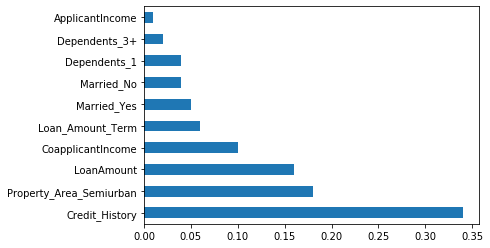

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.06)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

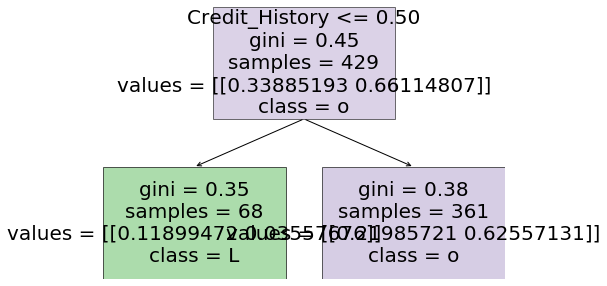

In [42]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# XG Boost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
              precision    recall  f1-score   support

           0       0.91      0.46      0.61        65
           1       0.77      0.97      0.86       120

    accuracy                           0.79       185
   macro avg       0.84      0.72      0.74       185
weighted avg       0.82      0.79      0.77       185

[[ 30  35]


,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,1.0,1.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2,1.0,1.0,4167.0,1447.0,158.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3,0.0,1.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
4,1.0,1.0,2718.0,0.0,70.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


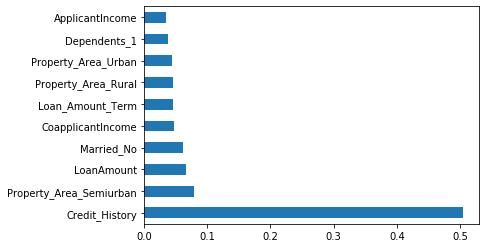

In [43]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

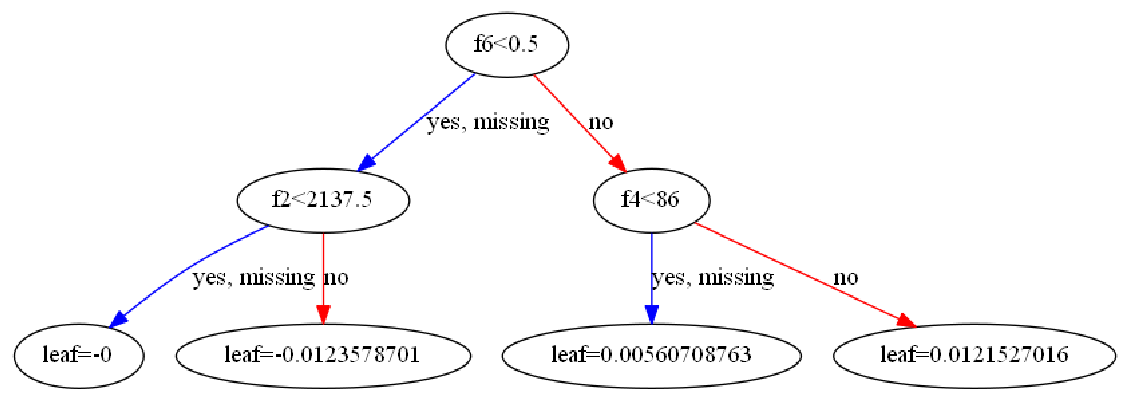

In [44]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# KNN

In [45]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.31      0.40      0.35        65
           1       0.61      0.52      0.56       120

    accuracy                           0.48       185
   macro avg       0.46      0.46      0.46       185
weighted avg       0.51      0.48      0.49       185

[[26 39]
 [58 62]]
Accuracy of the model: 0.49


,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
1,1.0,1.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
2,1.0,1.0,4167.0,1447.0,158.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
3,0.0,1.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
4,1.0,1.0,2718.0,0.0,70.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


# SVM

In [46]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        65
           1       0.66      1.00      0.79       120

    accuracy                           0.66       185
   macro avg       0.83      0.52      0.43       185
weighted avg       0.78      0.66      0.53       185

[[  2  63]
 [  0 120]]
Accuracy of the model: 0.53


,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,1.0,1.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2,1.0,1.0,4167.0,1447.0,158.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3,0.0,1.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
4,1.0,1.0,2718.0,0.0,70.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.89      0.49      0.63        65
           1       0.78      0.97      0.86       120

    accuracy                           0.80       185
   macro avg       0.83      0.73      0.75       185
weighted avg       0.82      0.80      0.78       185

[[ 32  33]
 [  4 116]]
Accuracy of the model: 0.78


,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,1.0,1.0,9083.0,0.0,228.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,1.0,1.0,4310.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
2,1.0,1.0,4167.0,1447.0,158.0,360.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3,0.0,1.0,2900.0,0.0,71.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
4,1.0,1.0,2718.0,0.0,70.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
